# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

### Домашние задания

##### 1. 
Проведите небольшое исследование алгоритма градиентного спуска на данных из урока. Оцените влияние значений скорости обучения (`eta`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],     # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора

# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [4]:
n = X.shape[0]
eta = 1e-3
iterations = 1001
w = np.array([1, 0.5])
results = []

for i in range(iterations):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (2/n * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        results.append([i, w, err])
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

results = np.array(results)

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653672
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428639
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297
1000 [31.66648131  6.78503276] 176.46806566379882


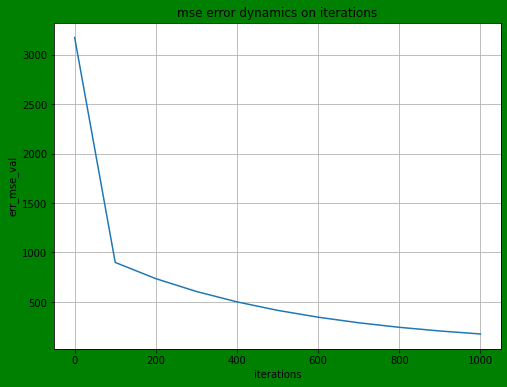

In [5]:
plt.figure(figsize=(8,6), facecolor="g")
plt.plot(results[:,0], results[:,2])
plt.title("mse error dynamics on iterations")
plt.xlabel("iterations")
plt.ylabel("err_mse_val")
plt.grid()
plt.show()

Будем изменять значение количество итераций `iterations` в диапазоне от 100 до 1e4 и посмотрим как меняется значение ошибки; построим график.

In [6]:
n = X.shape[0]
eta = 1e-3
iterations = [i for i in range(1000, 1401, 50)]
w = np.array([1, 0.5])
results = []

for k in iterations:
    for i in range(k):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= eta * (2/n * np.sum(X[:,j] * (y_pred - y)))
#         if i % 100 == 0:
    print(k, w, err)
    results.append([k, w, err])
    #         print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

results = np.array(results)

1000 [31.6502796   6.78802453] 176.7399358190342
1050 [42.00549358  4.87585506] 60.65465188819145
1100 [45.56782205  4.21804385] 47.429782816834106
1150 [46.72903577  4.00361686] 46.07386343425251
1200 [47.08776734  3.93737433] 45.94872959640583
1250 [47.19281173  3.91797708] 45.93833339289065
1300 [47.22197127  3.91259255] 45.93755573844653
1350 [47.22964567  3.91117541] 45.937503359536436
1400 [47.23156086  3.91082176] 45.937500182483376


In [7]:
# прирост значения ошибки:
results[:-1,2] - results[1:,2]

array([116.08528393084275, 13.224869071357347, 1.3559193825815967,
       0.12513383784667553, 0.01039620351518522, 0.0007776544441213673,
       5.2378910091022135e-05, 3.1770530597441393e-06], dtype=object)

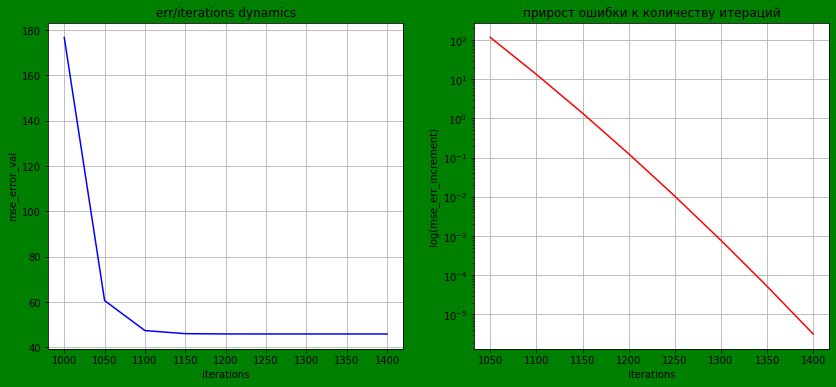

In [8]:
plt.figure(figsize=(14,6), facecolor="g")

plt.subplot(121)
plt.plot(results[:,0], results[:,2], c="b")
plt.title("err/iterations dynamics")
plt.xlabel("iterations")
plt.ylabel("mse_error_val")
plt.grid()

plt.subplot(122)
plt.plot(results[1:,0], (results[:-1,2]) - results[1:,2], c="r")
plt.title("прирост ошибки к количеству итераций")
plt.xlabel("iterations")
plt.ylabel("log(mse_err_increment)")
plt.yscale("log")
plt.grid()

plt.show()

##### Путем перебора последовательных итераций в диапазоне от 1000 до 10000 - видно, что значение ошибки (прогноза) полученное аналитическим методом (МНК) достигается с точностью до 4 знака после запятой в районе 1300 интераций;

Посмотрим как будет влиять скорость обучения $\eta$ на величину ошибки;
Будем изменять величину $\eta$ в диапазоне от $(0, 1)$; 

Зададим критерий останова точность полученного mse на уровке `1e-4`, если ошибка "улетает" в бесконечность - останавливаем цикл и считаем количество итераций.

In [9]:
n = X.shape[0]
eta = [10**(-i) for i in range(7)]
iterations = 100001
w = np.array([1, 0.5])
results = []

for k in eta:
    w = np.array([1, 0.5])
    for i in range(iterations):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
#         print(i, y_pred, err)
        if abs(45.9375 - err) < 1e-4: break
        if err == np.inf: break
        for j in range(w.shape[0]):
            w[j] -= k * (2/n * np.sum(X[:,j] * (y_pred - y)))
    print(f"{k:.6f}, {i:06}, {err:010.6f}")
    results.append([k, i, err])

results = np.array(results)

1.000000, 000104, 0000000inf
0.100000, 000500, 0000000inf
0.010000, 000774, 045.937598
0.001000, 007769, 045.937600
0.000100, 077718, 045.937600
0.000010, 100000, 176.607949
0.000001, 100000, 900.133412


За поведением ошибки (mse_error) уже более интересно наблюдать и делать выводы.

    eta,      iters,  err
    1.000000, 000104,        inf
    0.100000, 000500,        inf
    0.010000, 000774, 045.937598
    0.001000, 007769, 045.937600
    0.000100, 077718, 045.937600
    0.000010, 100000, 176.607949
    0.000001, 100000, 900.133412
    
как видно из данных при `eta=1.0` и `eta=.1` вообще не достагается оптимума ни с какой точностью. Происходит "взрыв градиента", по образному опеределению преподавателя: 
    
> "градиент взрывается и мы как на ракете уносимся вдаль функции ошибки."

Соответственно чтобы унестись вдаль (т.е. в бесконечность - infinum) в первом случае нам потребовалось всего 104 итерации, во втором 500.

Мы видим что наименьшее число итераций чтобы достичь "аналитического" значения ошибки с заданной точностью (я задал с точностью до 4-го знака после запятой) потребовалось всего 744 итерации при eta=.01; При уменьшении шага градиента на порядок (т.е. в 10 раз) количество необходимых итераций увеличивается также на порядок (т.е. в 10 раз), а на последних двух 1e5 - такое количество итераций оказалось недостаточно чтобы даже отдаленно приблизиться к "аналитически" вычесленному значению ошибки mse.

Интересно посмотреть как ведет себя градиентный спуск в диапазоне $\eta \in (.1; .001)$;


In [10]:
n = X.shape[0]
eta2 = [10 ** exponent for exponent in np.linspace(-1, -3, 12)]
iterations = 100001
w = np.array([1, 0.5])
results2 = []

for k in eta2:
    w = np.array([1, 0.5])
    for i in range(iterations):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
#         print(i, y_pred, err)
        if abs(45.9375 - err) < 1e-4: break
        if err == np.inf: break
        for j in range(w.shape[0]):
            w[j] -= k * (2/n * np.sum(X[:,j] * (y_pred - y)))
    print(k, i, err)
    results2.append([k, i, w, err])

results2 = np.array(results2)

0.1 500 inf
0.0657933224657568 534 45.937599523513335
0.04328761281083057 176 45.93759527373542
0.02848035868435802 269 45.93759900153364
0.01873817422860384 411 45.93759890687847
0.012328467394420659 627 45.93759839045161
0.008111308307896872 955 45.937598548321475
0.005336699231206312 1453 45.93759923361717
0.003511191734215131 2210 45.93759962333034
0.002310129700083158 3361 45.937599674560225
0.0015199110829529332 5110 45.93759983983227
0.001 7769 45.93759980816623


Очень удивительный вывод: для достижения "эталона ошибки" с точностью до 4-х знаков после запятой достигается при значении $\eta\approx.043288$ - при этом значении $\eta$ нам потребуется всего лишь 176 итераций для достижения минимума ошибки; далее скорость градиентного спуска замедляется.

Причем выглядит это так как будто бы мы прямиком из "далей" (из бесконечности) функции ошибки  выпали рядом с оптимальной по количеству интерации точке.

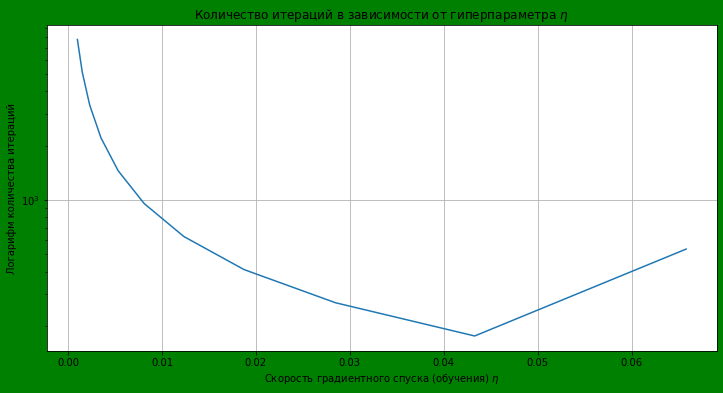

In [11]:
results2[0,1] = np.inf
plt.figure(figsize=(12,6), facecolor="g")
plt.plot(results2[:,0], results2[:,1])
plt.yscale("log")
plt.title("Количество итераций в зависимости от гиперпараметра $\eta$")
plt.xlabel("Скорость градиентного спуска (обучения) $\eta$")
plt.ylabel("Логарифм количества итераций")
plt.grid()
plt.show()

Какие общие выводы можно заключить?
1. минимум ошибки `mse` достижим для широкого диапазона $\eta \in [.05;0)$;
2. количество итераций для каждого принятого уровня $\eta$ - различается. Эта зависимость ($\eta$ от количества итераций) тоже имеет парабаллическую форму - имеет экстремум (единственный) - точка минимума (в нашем случае он находится в окрестности $\eta\approx .0433$)
В этой зависимости есть двойственность. С одной стороны для любого выбранного значения $\eta$ (из релевантного диапазона) понадобится разное количество итераций для вычисления минимума mse с приемлемой точностью - значение ошибки будет ассимптотически приближаться к минимуму с ростом количества итераций. С другой стороны меняя гиперпараметр $\eta$ мы можем кратно (в десятки раз) сходу сократить количество итераций. Значит основные усилия нужно сосредоточить на поиску подходящего значения скорости обучения (градиентного спуска) $\eta$ - собственно это ответ на вопрос: "Как можно ускорить процесс вычисления весов?" - нужно подобрать оптимальный параметр обучения $\eta$.
Сделать это можно либо поиском по сетке либо другими методами.... - сходимость градиента как я понял зависит от многих факторов, в частности от формы функции ошибок (степени её гладкости - количества производных, которые можно взять пока она не превратитсья в константу), от начальной точки, из которой начинается градиентный спуск и др.
3. Наименьшее количество итераций достигается при значении $\eta$ в окрестности точки $\eta=.0433$ и достигает `iter=176` итераций (можно еще точнее вычислить значения этих гиперпараментров, но я думаю это не очень принципиально - суть ясна).

##### *2. 
В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [12]:
w = np.array([1, 0.5])
iter_ = 1000
eta = .0433

for i in range(iter_):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    w -= eta * (1/n * 2 * np.sum(X.T * (y_pred - y), axis=1))
    # w -= eta * (2/n * (X.T @ (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [ 5.77166 15.222  ] 3173.15
100 [46.81167484  3.98835692] 46.041720481883125
200 [47.22794481  3.91148949] 45.93751038920817
300 [47.23210094  3.91072203] 45.937500001035644
400 [47.23214244  3.91071436] 45.93750000000009
500 [47.23214285  3.91071429] 45.9375
600 [47.23214286  3.91071429] 45.93750000000001
700 [47.23214286  3.91071429] 45.93750000000001
800 [47.23214286  3.91071429] 45.93749999999999
900 [47.23214286  3.91071429] 45.93749999999999


Ошибка заключалась в том, что в ошибочном варианте функция np.sum() выдавала скаляр, тогда как ожидалось по логике - результатом должен быть вектор (список из двух значений); учитывая размерности складываемых массивов требовалось добавить в функции `np.sum()` именованный аргумент `axis=1` чтобы выполнить суммирование по горизонтальным \[строкам\].

Это не единственный "fix" - можно было бы выполнить `numpy.dot product` - скалярное умножение двух массивов:

`w -= eta * 2/n * (X.T @ (y_pred - y))` итогом которого был бы `np.array` размерностью: (2, )

##### *3. 
Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse за одну итерацию в размере diff=1e-6, а значение eta=1e-2?

In [13]:
w = np.array([1, 0.5])
diff = 1e-6
eta = 1e-2
mse_err = 45.937500 # эталонное значение ошибки
err = 0 # начальное значение для ошибки;
i = 0 # количество итераций

while (abs(mse_err - err) > diff) & (err != np.inf):
    y_pred = X @ w
    err = calc_mse(y, y_pred)
    w -= eta * 2/n * (X.T @ (y_pred - y))
    i += 1

    if (i % 100 == 0) & (err < 1e6):
        print(f"{i}, {err:.4f}, {abs(mse_err - err):.6f}")
    elif (i % 100 == 0) & (err > 1e6):
        print(f"Наш градиент взрывается.")
    
    if err == np.inf: # при eta = .1
        print(f"Наш градиент взорвался! Ошибка достигла бесконечности.")
    
print(f"\nколичество итераций: {i},\n"
      f"подобранные коэффициенты модели: {w},\n"
      f"значение ошибки: {err},\n"
      f"\"точность\" ошибки: {abs(mse_err - err)}")

100, 177.9249, 131.987448
200, 62.2553, 16.317847
300, 47.9549, 2.017405
400, 46.1869, 0.249415
500, 45.9683, 0.030836
600, 45.9413, 0.003812
700, 45.9380, 0.000471
800, 45.9376, 0.000058
900, 45.9375, 0.000007

количество итераций: 995,
подобранные коэффициенты модели: [47.23080079  3.91096211],
значение ошибки: 45.93750098877656,
"точность" ошибки: 9.887765628491252e-07


При данном значении начальных весов, гиперпараметра $\eta$ и принятой точности ошибки алгоритму потребовалось выполнить 995 итераций для достижения минимума ошибки `mse` для вычисления параметров модели.